In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pyspectre as ps
import pynut as nut
from rich.progress import Progress

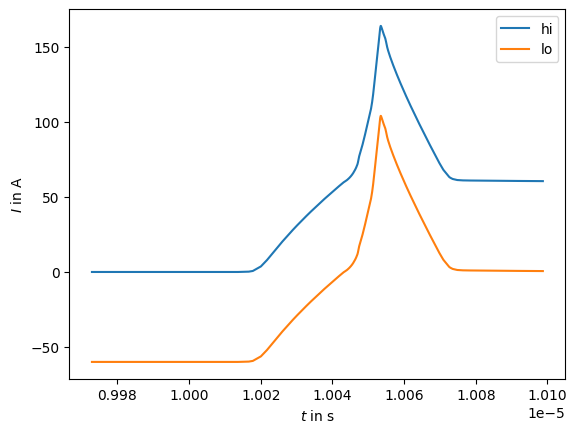

In [45]:
netlist: str = './netlist_GS66516T.scs'

session = ps.start_session(netlist, [])

res = ps.run_all(session)["Transient Analysis `tran': time = (0 s -> 17 us)"]

time = res.time
i_hi = res['Itrans_high:2'].values
i_lo = res['Itrans_low:2'].values
v_hi = (res.plus_Vq - res.Vout).values
v_lo = (res.Vout - res.minus_Vq).values
p_hi = i_hi * v_hi
p_lo = i_lo * v_lo

zoom = time[(time > 0.997e-5) & (time < 1.01e-5)].index

plt.plot(time[zoom], i_hi[zoom], label = 'hi')
plt.plot(time[zoom], i_lo[zoom], label = 'lo')
plt.xlabel('$t$ in s')
plt.ylabel('$I$ in A')
plt.legend()
# plt.show()

In [8]:
cols = ['Rgon', 'Iout', 'peak_hi', 'peak_lo']

def sim(rgon,iout):
    _       = ps.set_parameters(session, {'Rgon': rgon, 'I_L': iout})
    res     = ps.run_all(session)["Transient Analysis `tran': time = (0 s -> 17 us)"]
    i_hi    = res['trans_high:2'].values
    i_lo    = res['trans_low:2'].values
    v_hi    = (res.plus_Vq - res.Vout).values
    v_lo    = (res.Vout - res.minus_Vq).values
    peak_hi = np.max(i_hi * v_hi)
    peak_lo = np.max(i_lo * v_lo)
    return pd.DataFrame(np.array([[rgon, iout, peak_hi, peak_lo]]), columns = cols)


<>:12: SyntaxWarning: invalid escape sequence '\O'
<>:12: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipykernel_736763/2565104891.py:12: SyntaxWarning: invalid escape sequence '\O'
  ax.set_xlabel('$R_{g,on}$ in $\Omega$')


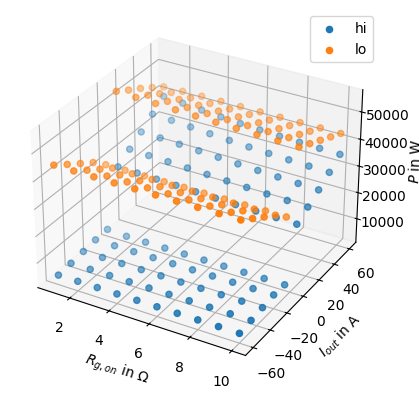

In [9]:
rgons = np.linspace(1.0,10.0,10)
iouts = np.linspace(-60,60,10)


df = pd.concat( [ sim(r,i) for i in np.linspace(-60,60,10)
                                for r in np.linspace(1.0,10.0,10)]
                , axis = 0, ignore_index = True )

ax = plt.axes(projection ="3d")
ax.scatter3D(df.Rgon.values, df.Iout.values, df.peak_hi.values, label = 'hi')
ax.scatter3D(df.Rgon.values, df.Iout.values, df.peak_lo.values, label = 'lo')
ax.set_xlabel('$R_{g,on}$ in $\Omega$')
ax.set_ylabel('$I_{out}$ in A')
ax.set_zlabel('$P$ in W')
plt.legend()
# plt.show()